In [59]:
import mysql.connector as dbconnect
from mysql.connector import Error
from sqlalchemy import create_engine
import my_secrets
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [60]:
conn = dbconnect.connect(host='localhost', user=my_secrets.username, database='creditcard_capstone', password=my_secrets.password)
engine = create_engine('mysql+mysqlconnector://' + my_secrets.username + ":" + my_secrets.password + "@localhost:3306/creditcard_capstone")
conn = engine.connect()

Create an appropriate visualization to perform the following task -
Calculate and plot which transaction type has the highest transaction count.


In [61]:
query = "SELECT COUNT(TRANSACTION_ID) AS TOTAL,\
    TRANSACTION_TYPE FROM CDW_SAPP_CREDIT\
    GROUP BY TRANSACTION_TYPE\
    ORDER BY TOTAL DESC"
if conn.connection:
    df = pd.read_sql(query, conn)


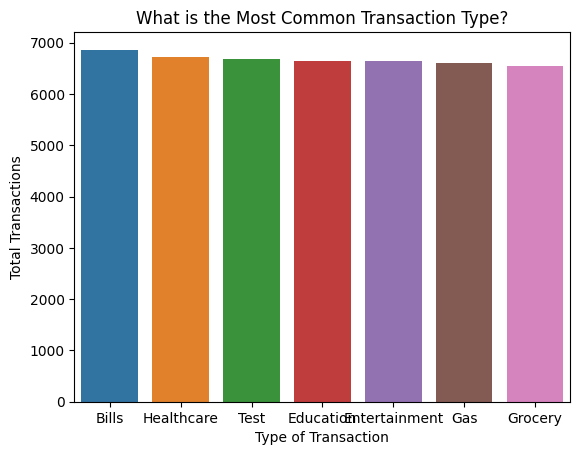

In [62]:
sns.barplot(data=df, x='TRANSACTION_TYPE', y="TOTAL", hue='TRANSACTION_TYPE')
plt.xlabel("Type of Transaction")
plt.ylabel("Total Transactions")
plt.title("What is the Most Common Transaction Type?")
plt.show()

Calculate and plot top 10 states with the highest number of customers.

In [63]:
query = "SELECT CUST_STATE,\
    COUNT(CUST_ID) AS TOTAL FROM CDW_SAPP_CUSTOMER\
    GROUP BY CUST_STATE\
    ORDER BY TOTAL DESC LIMIT 10"

if conn.connection:
    df1 = pd.read_sql(query, conn)


df1

,CUST_STATE,TOTAL
0,NY,96
1,GA,73
2,PA,72
3,FL,64
4,IL,58
5,NJ,53
6,MD,50
7,CA,45
8,OH,44
9,MI,44


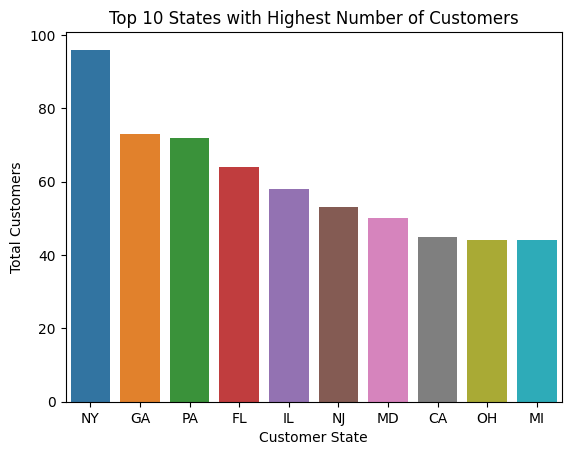

In [64]:
sns.barplot(data=df1, x='CUST_STATE', y="TOTAL", hue='CUST_STATE')
plt.xlabel("Customer State")
plt.ylabel("Total Customers")
plt.title("Top 10 States with Highest Number of Customers")
plt.show()

Create a single appropriate visualization to perform the following task -
Calculate the total transaction sum for each customer based on their individual transactions. Identify the top 10 customers with the highest transaction amounts (in dollar value). Create a plot to showcase these top customers and their transaction sums.

Hint (use CUST_SSN). 


In [65]:
query = "SELECT CDW_SAPP_CUSTOMER.CUST_ID,\
    CONCAT(CDW_SAPP_CUSTOMER.FIRST_NAME, ' ', CDW_SAPP_CUSTOMER.LAST_NAME) AS NAME,\
    COUNT(CDW_SAPP_CREDIT.TRANSACTION_ID) AS TOTAL,\
    SUM(TRANSACTION_VALUE) AS SUM\
    FROM CDW_SAPP_CUSTOMER JOIN CDW_SAPP_CREDIT ON CDW_SAPP_CUSTOMER.CUST_ID = CDW_SAPP_CREDIT.CUST_ID\
    GROUP BY CDW_SAPP_CUSTOMER.CUST_ID\
    ORDER BY SUM DESC LIMIT 10"
if conn.connection:
    df2 = pd.read_sql(query, conn, index_col='CUST_ID')

df2

,NAME,TOTAL,SUM
CUST_ID,,,
27,Ty Daly,96,5633.07
94,Jessie Boucher,97,5548.14
939,Phoebe Martin,95,5476.08
251,Thurman Vera,99,5314.97
396,Bret Perkins,99,5261.03
497,Joesph Mcclain,98,5241.18
181,Aurelia Haas,91,5223.96
148,Marcelo Emerson,96,5203.08
79,Alexis Villarreal,91,5149.75


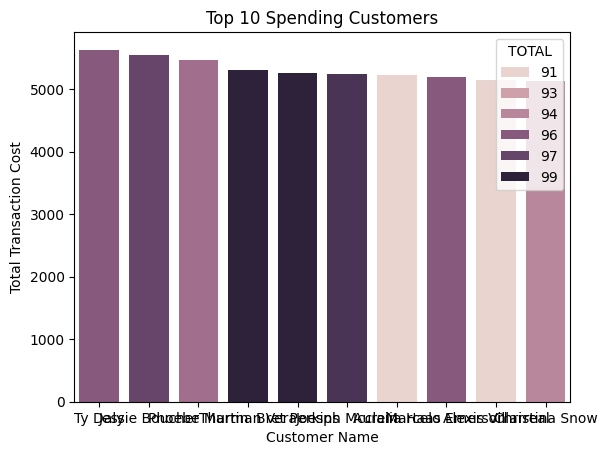

In [66]:
sns.barplot(data=df2, x='NAME', y="SUM", hue='TOTAL')
plt.xlabel("Customer Name")
plt.ylabel("Total Transaction Cost")
plt.title("Top 10 Spending Customers")
plt.show()

Create an appropriate visualization to perform the following task -
Calculate and plot the percentage of applications approved for self-employed applicants. Use the appropriate chart or graph to represent this data.
Note: Take a screenshot of the graph.  Save a copy of the visualization, making sure it is PROPERLY NAMED!




In [168]:
query = "SELECT COUNT(A_ID) AS Total, Application_Status, Self_Employed FROM CDW_SAPP_CREDIT_APPLICATION GROUP BY Application_Status, Self_Employed"

if conn.connection:
    df3 = pd.read_sql(query, conn)

df3

,Total,Application_Status,Self_Employed
0,301,1,0
1,140,0,0
2,46,1,1
3,24,0,1


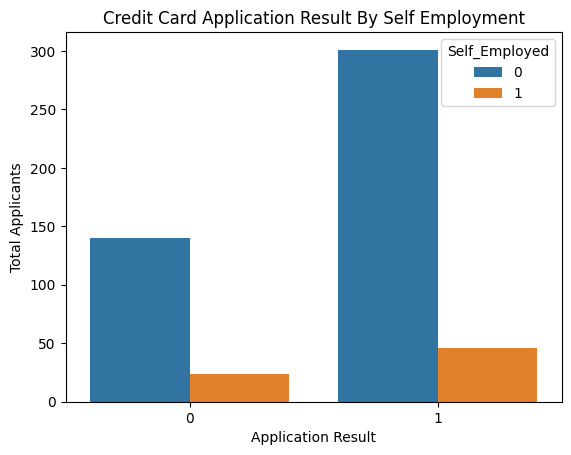

In [169]:
sns.barplot(data=df3, x='Application_Status', y="Total", hue='Self_Employed')
plt.xlabel("Application Result")
plt.ylabel("Total Applicants")
plt.title("Credit Card Application Result By Self Employment")
plt.show()

Create an appropriate visualization to perform the following task -
Calculate the percentage of rejection for married male applicants. Use the ideal chart or graph to represent this data.


In [170]:
query = "SELECT COUNT(A_ID)/(SELECT COUNT(A_ID) FROM CDW_SAPP_CREDIT_APPLICATION WHERE Married = 0 AND Gender = 'Male')*100 AS Percent,\
        (CASE Application_Status WHEN 1 THEN 'Approved' ELSE 'Declined' END) as Result,\
        COUNT(A_ID) AS Total\
        FROM CDW_SAPP_CREDIT_APPLICATION WHERE Married = 0 AND Gender = 'Male' GROUP BY Application_Status"

if conn.connection:
    df4 = pd.read_sql(query, conn)

df4

,Percent,Result,Total
0,62.2807,Approved,71
1,37.7193,Declined,43


In [230]:

string = ""
labels=[string.join(" " + item[2] + "\n(" + str(item[3]) + " Total)") for item in df4.itertuples()]
for item in df4.itertuples():
    print(" " + str(round(item[1], 2)) + "%\n(" + str(item[3]) + " Total)")

labels


 62.28%
(71 Total)
 37.72%
(43 Total)


[' Approved\n(71 Total)', ' Declined\n(43 Total)']

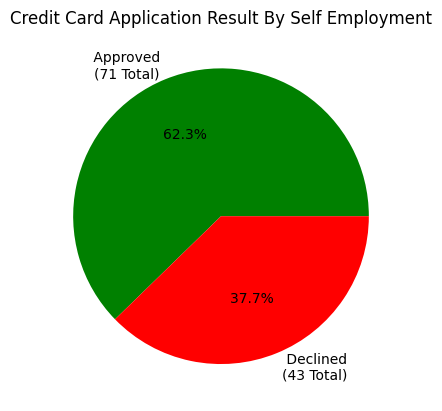

In [231]:
plt.pie(
    data=df4, 
    x='Percent', 
    labels=labels, 
    autopct='%1.1f%% ',
    colors=['green', 'red']
    
    )
plt.pie
plt.title("Credit Card Application Result By Self Employment")
plt.show()

Create an appropriate visualization to perform the following task -
Calculate and plot the top three months with the largest volume of transaction data. Use the ideal chart or graph to represent this data.
(hint: use `CDW_SAPP_CREDIT_CARD` table)


In [81]:
query = "SELECT * FROM CDW_SAPP_CREDIT"

if conn.connection:
    df4 = pd.read_sql(query, conn)

df4

,CREDIT_CARD_NO,TIMEID,BRANCH_CODE,TRANSACTION_TYPE,TRANSACTION_VALUE,TRANSACTION_ID,CUST_ID
0,4210653349028689,20180214,114,Education,78.90,1,777
1,4210653349028689,20180320,35,Entertainment,14.24,2,777
2,4210653349028689,20180708,160,Grocery,56.70,3,777
3,4210653349028689,20180419,114,Entertainment,59.73,4,777
4,4210653349028689,20181010,93,Gas,3.59,5,777
...,...,...,...,...,...,...,...
46689,4210653344660822,20180912,49,Gas,66.20,46690,634
46690,4210653344660822,20180205,168,Grocery,100.13,46691,634
46691,4210653344660822,20181216,104,Test,35.83,46692,634
46692,4210653344660822,20180115,32,Entertainment,90.99,46693,634


In [101]:
query = "SELECT SUBSTRING(CAST(TIMEID AS CHAR), 1, 6) AS YEAR,\
    COUNT(TRANSACTION_ID) AS TOTAL FROM CDW_SAPP_CREDIT\
        GROUP BY YEAR\
            ORDER BY TOTAL DESC\
                LIMIT 3"

if conn.connection:
    df5 = pd.read_sql(query, conn)

df5

,YEAR,TOTAL
0,201802,3959
1,201805,3946
2,201810,3946


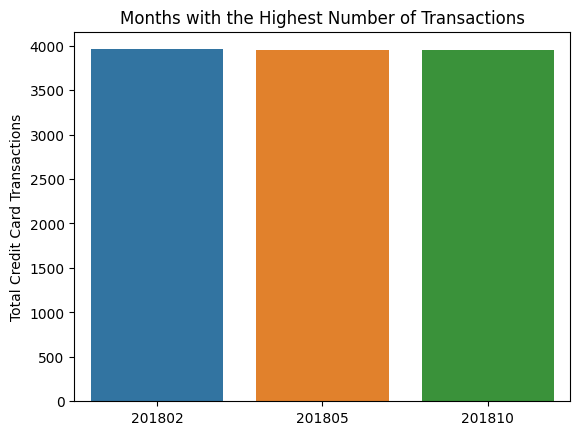

In [106]:
sns.barplot(data=df5, x='YEAR', y="TOTAL", hue="YEAR")
plt.xlabel("")
plt.ylabel("Total Credit Card Transactions")
plt.title("Months with the Highest Number of Transactions")
plt.show()

Create an appropriate visualization to perform the following task -
Calculate and plot which branch processed the highest total dollar value of healthcare transactions. Use the ideal chart or graph to represent this data.
(hint: use `CDW_SAPP_CREDIT_CARD` table)



In [117]:
query = "SELECT SUM(c.TRANSACTION_VALUE) AS TOTAL,\
        c.BRANCH_CODE, b.BRANCH_CITY FROM CDW_SAPP_CREDIT AS c\
        JOIN CDW_SAPP_BRANCH AS b ON b.BRANCH_CODE = c.BRANCH_CODE\
        WHERE TRANSACTION_TYPE = 'Healthcare'\
        GROUP BY BRANCH_CODE ORDER BY TOTAL DESC LIMIT 5"

if conn.connection:
    df5 = pd.read_sql(query, conn)

df5

,TOTAL,BRANCH_CODE,BRANCH_CITY
0,4370.18,25,NewBaltimore
1,4072.04,60,Richmond
2,4003.37,83,Brookfield
3,3823.87,36,ElDorado
4,3720.27,111,Kernersville


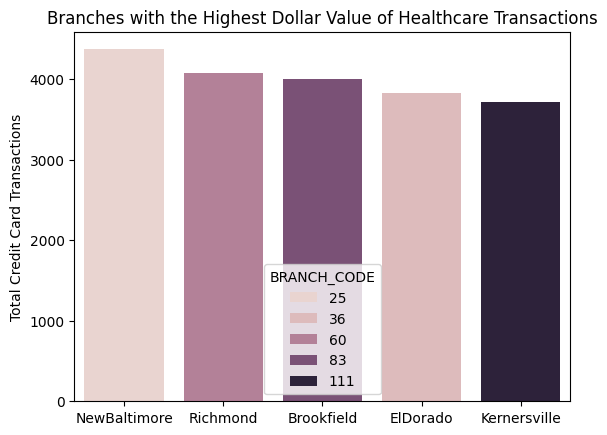

In [119]:
sns.barplot(data=df5, x='BRANCH_CITY', y="TOTAL", hue="BRANCH_CODE")
plt.xlabel("")
plt.ylabel("Total Credit Card Transactions")
plt.title("Branches with the Highest Dollar Value of Healthcare Transactions")
plt.show()